In [3]:
import numpy as np
import pandas as pd

https://www.sciencedirect.com/science/article/pii/S2324242624000639#tbl2
Reasearch paper
acc is 95.16 
ours reached to 95.21

https://www.researchgate.net/publication/367330760_Prediction_of_Brain_Stroke_using_Machine_Learning_Algorithms_and_Deep_Neural_Network_Techniques
accuracy is 99% using the RandomForest

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10130159
Accuracy on whole dataset using randomForest is 90.36 (Data leakage)
Accuracy on train test split is 82.23(No data leakage)

https://repository.uel.ac.uk/download/0274a980ac13a6a854ae09d724261d2b2488f56dd0e67425718bdbe90d6391bb/2240909/Analysing%20an%20imbalanced%20stroke%20prediction%20dataset%20using%20machine%20l.pdf
Need to go through this yet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#%matplotlib inline
#plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')


In [5]:
import os
import pandas as pd

# Load dataset
dataset = pd.read_csv("../Datasets/healthcare-dataset-stroke-data.csv")
print(dataset.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## pre processing

In [6]:
data=dataset.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#filling mean
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [10]:
data.drop(columns=['id'],axis=1,inplace=True) 
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
categorical_var=['gender','ever_married','work_type','Residence_type','smoking_status']
numerical_var=['age','hypertension','heart_disease','avg_glucose_level','bmi']

In [12]:
print("number of unique variables")
print('work_type:',data['work_type'].unique())
print('gender:',data['gender'].unique())
print('Residence_type:',data['Residence_type'].unique())
print('ever_married:',data['ever_married'].unique())
print('smoking_status:',data['smoking_status'].unique()) 

number of unique variables
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender: ['Male' 'Female' 'Other']
Residence_type: ['Urban' 'Rural']
ever_married: ['Yes' 'No']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [13]:
# le=LabelEncoder() #creating an isntance of LabelEncoder class
# smoking_status = le.fit_transform(data['smoking_status'])
# gender = le.fit_transform(data['gender'])
# ever_married = le.fit_transform(data['ever_married'])
# Residence_type = le.fit_transform(data['Residence_type'])
# work_type = le.fit_transform(data['work_type'])

In [14]:
data['smoking_status'] = data['smoking_status'].replace({ 
    'smokes': 'smokes', 
    'formerly smoked': 'Former smoker',
    'never smoked': 'Never smoked',
    'Unknown': 'Never smoked'
})

In [15]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,Former smoker,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,Never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,Never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,Never smoked,1


In [16]:
# Create new columns based on age ranges
data["AgeCategory_0-9"] = (data["age"] >= 0) & (data["age"] <= 9)
data["AgeCategory_10-19"] = (data["age"] >= 10) & (data["age"] <= 19)
data["AgeCategory_20-24"] = (data["age"] >= 20) & (data["age"] <= 24)
data["AgeCategory_25-59"] = (data["age"] >= 25) & (data["age"] <= 59)
data["AgeCategory_60 or older"] = (data["age"] >= 60)

# Remove the original Age column
data.drop("age", axis=1, inplace=True)

In [17]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,Former smoker,1,False,False,False,False,True
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,Never smoked,1,False,False,False,False,True
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,Never smoked,1,False,False,False,False,True
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,False,False,False,True,False
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,Never smoked,1,False,False,False,False,True


In [18]:
data.replace({True:1, False:0}, inplace=True)
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,Former smoker,1,0,0,0,0,1
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,Never smoked,1,0,0,0,0,1
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,Never smoked,1,0,0,0,0,1
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,0,0,1,0
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,Never smoked,1,0,0,0,0,1


In [19]:
# Create new columns based on SmokerStatus
data["Never smoked"] = (data["smoking_status"] == 'Never smoked')
data["smokes"] = (data["smoking_status"] == 'smokes')
data["Former smoker"] = (data["smoking_status"] == 'Former smoker')

# Remove the original SmokerStatus column
data.drop("smoking_status", axis=1, inplace=True)

In [20]:
data.replace({True:1, False:0}, inplace=True)
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,1,0,0,0,0,1,0,0,1
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,1,0,0,0,0,1,1,0,0
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,1,0,0,0,0,1,1,0,0
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,1,0,0,0,1,0,0,1,0
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,1,0,0,0,0,1,1,0,0


In [21]:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

# Create new columns based on SmokerStatus
data["work_type_private"] = (data["work_type"] == 'Private') 
data["work_type_self_employed"] = (data["work_type"] == 'Self-employed') 
data["work_type_govt"] = (data["work_type"] == 'Govt_job') 
data["work_type_children"] = (data["work_type"] == 'children') 
data["work_type_unemployed"] = (data["work_type"] == 'Never_worked')  
# Remove the original SmokerStatus column
data.drop("work_type", axis=1, inplace=True) 

In [22]:
data.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,AgeCategory_0-9,AgeCategory_10-19,...,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker,work_type_private,work_type_self_employed,work_type_govt,work_type_children,work_type_unemployed
0,Male,0,1,Yes,Urban,228.69,36.600000,1,0,0,...,0,1,0,0,1,True,False,False,False,False
1,Female,0,0,Yes,Rural,202.21,28.893237,1,0,0,...,0,1,1,0,0,False,True,False,False,False
2,Male,0,1,Yes,Rural,105.92,32.500000,1,0,0,...,0,1,1,0,0,True,False,False,False,False
3,Female,0,0,Yes,Urban,171.23,34.400000,1,0,0,...,1,0,0,1,0,True,False,False,False,False
4,Female,1,0,Yes,Rural,174.12,24.000000,1,0,0,...,0,1,1,0,0,False,True,False,False,False


In [23]:
data['gender'] = (data['gender']=='Male')
data['ever_married'] = (data['ever_married']=='Yes')
data['Residence_type'] = (data['Residence_type']=='Urban')

In [24]:
data.replace({True:1, False:0}, inplace=True)

In [25]:

data.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,AgeCategory_0-9,AgeCategory_10-19,...,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker,work_type_private,work_type_self_employed,work_type_govt,work_type_children,work_type_unemployed
0,1,0,1,1,1,228.69,36.600000,1,0,0,...,0,1,0,0,1,1,0,0,0,0
1,0,0,0,1,0,202.21,28.893237,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,1,0,1,1,0,105.92,32.500000,1,0,0,...,0,1,1,0,0,1,0,0,0,0
3,0,0,0,1,1,171.23,34.400000,1,0,0,...,1,0,0,1,0,1,0,0,0,0
4,0,1,0,1,0,174.12,24.000000,1,0,0,...,0,1,1,0,0,0,1,0,0,0


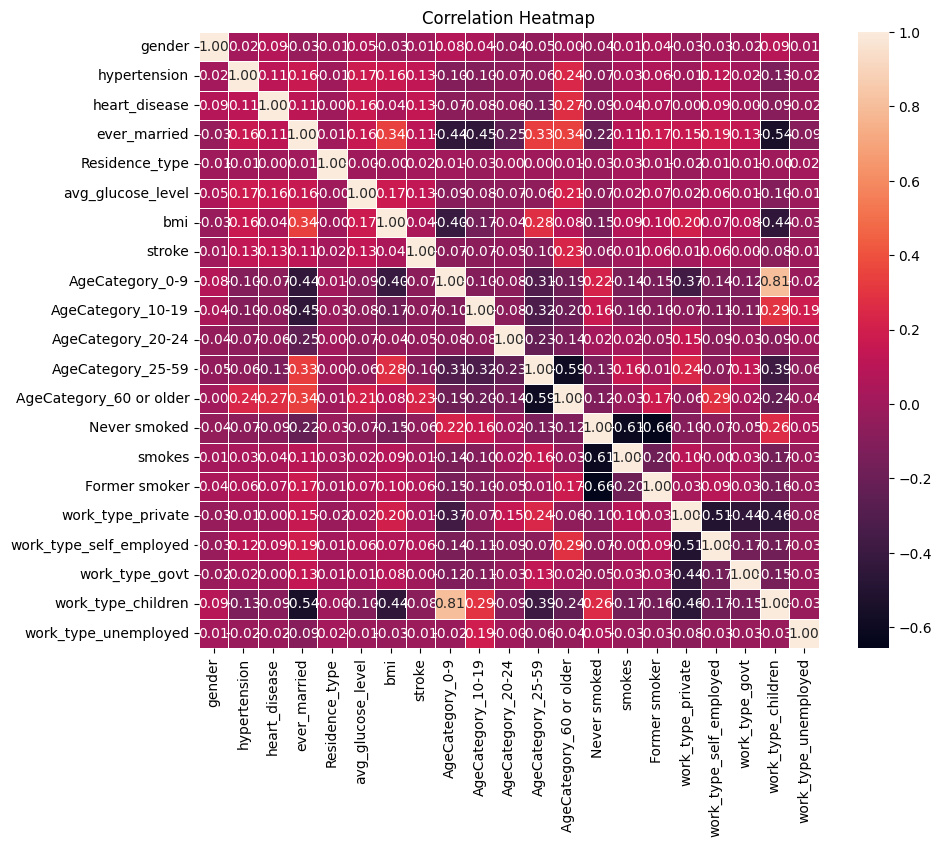

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
print(data['Residence_type'].value_counts())

Residence_type
1    2596
0    2514
Name: count, dtype: int64


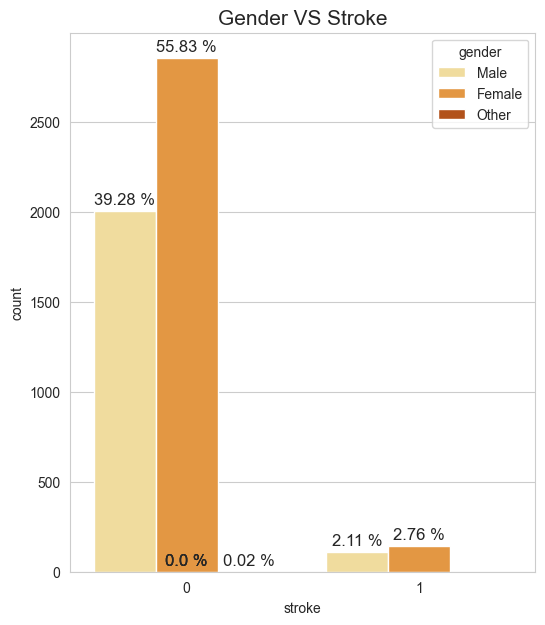

In [28]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

In [29]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [30]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)
X=pd.DataFrame(X)

In [31]:
X

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker,work_type_private,work_type_self_employed,work_type_govt,work_type_children,work_type_unemployed
0,1,0,1,1,1,228.69,36.600000,0,0,0,0,1,0,0,1,1,0,0,0,0
1,0,0,0,1,0,202.21,28.893237,0,0,0,0,1,1,0,0,0,1,0,0,0
2,1,0,1,1,0,105.92,32.500000,0,0,0,0,1,1,0,0,1,0,0,0,0
3,0,0,0,1,1,171.23,34.400000,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,1,0,1,0,174.12,24.000000,0,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,83.75,28.893237,0,0,0,0,1,1,0,0,1,0,0,0,0
5106,0,0,0,1,1,125.20,40.000000,0,0,0,0,1,1,0,0,0,1,0,0,0
5107,0,0,0,1,0,82.99,30.600000,0,0,0,1,0,1,0,0,0,1,0,0,0
5108,1,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,1,0,0,0,0


In [32]:
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


## split dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5 ,random_state =28)

In [34]:
Y_train.value_counts()

stroke
0         2436
1          119
Name: count, dtype: int64

In [35]:
X_train

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker,work_type_private,work_type_self_employed,work_type_govt,work_type_children,work_type_unemployed
3746,1,0,0,0,1,84.60,18.4,1,0,0,0,0,1,0,0,0,0,0,1,0
3568,1,1,0,1,0,88.18,33.5,0,0,0,1,0,0,1,0,1,0,0,0,0
2390,0,0,0,1,1,85.13,24.6,0,0,0,0,1,1,0,0,1,0,0,0,0
4631,1,0,0,1,0,81.78,27.3,0,0,0,1,0,1,0,0,0,0,1,0,0
2557,1,0,0,1,1,150.10,25.3,0,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,0,0,0,1,1,131.42,24.9,0,0,0,1,0,0,1,0,1,0,0,0,0
87,0,0,1,1,0,59.35,32.3,0,0,0,0,1,0,0,1,1,0,0,0,0
1541,0,0,0,1,1,157.01,26.1,0,0,0,1,0,0,1,0,1,0,0,0,0
4089,1,0,0,1,1,57.59,32.8,0,0,0,1,0,1,0,0,0,0,1,0,0


In [36]:
X_test

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker,work_type_private,work_type_self_employed,work_type_govt,work_type_children,work_type_unemployed
4180,1,0,0,1,1,78.43,43.7,0,0,0,1,0,0,1,0,1,0,0,0,0
3601,0,0,0,0,1,82.05,21.0,0,0,0,1,0,1,0,0,1,0,0,0,0
5083,0,0,0,0,1,90.57,24.2,0,1,0,0,0,1,0,0,1,0,0,0,0
632,1,0,0,1,0,111.73,34.6,0,0,0,1,0,1,0,0,0,0,1,0,0
1419,1,0,0,1,1,81.94,27.7,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0,0,0,1,0,68.34,39.3,0,0,0,0,1,1,0,0,1,0,0,0,0
722,1,0,0,0,0,121.80,18.7,1,0,0,0,0,1,0,0,0,0,0,1,0
4441,0,0,0,1,1,87.40,24.5,0,0,0,1,0,0,0,1,1,0,0,0,0
849,0,1,0,1,1,99.60,34.3,0,0,0,0,1,0,0,1,0,1,0,0,0


In [37]:
Y_test

,stroke
4180,0
3601,0
5083,0
632,0
1419,0
...,...
623,0
722,0
4441,0
849,0


In [38]:
Y_train

,stroke
3746,0
3568,0
2390,0
4631,0
2557,0
...,...
4236,0
87,1
1541,0
4089,0


# training

In [39]:
# Count the occurrences of 0's and 1's in y_train
train_zeros = np.sum(Y_train == 0)
train_ones = np.sum(Y_train == 1)

# Count the occurrences of 0's and 1's in y_test
test_zeros = np.sum(Y_test == 0)
test_ones = np.sum(Y_test == 1)

# Print the counts
print(f"y_train: 0's = {int(train_zeros)}, 1's = {int(train_ones)}")
print(f"y_test: 0's = {int(test_zeros)}, 1's = {int(test_ones)}")

y_train: 0's = 2436, 1's = 119
y_test: 0's = 2425, 1's = 130


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Assuming Y_train and Y_test are your training and testing labels

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Voting Classifier with different models
voting_clf = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('svc', SVC())
], voting='hard')

models['Voting Classifier'] = voting_clf

# Prepare for the loop
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict using the trained model
    Y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Print summary for each model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 40)

# Optionally, if ANN is required later, you can train an artificial neural network (ANN) using libraries like Keras or TensorFlow.


Model: Decision Tree
Accuracy: 0.9174
Confusion Matrix:
[[2322  103]
 [ 108   22]]
----------------------------------------
Model: Logistic Regression
Accuracy: 0.9487
Confusion Matrix:
[[2424    1]
 [ 130    0]]
----------------------------------------
Model: SVM
Accuracy: 0.9491
Confusion Matrix:
[[2425    0]
 [ 130    0]]
----------------------------------------
Model: AdaBoost
Accuracy: 0.9491
Confusion Matrix:
[[2425    0]
 [ 130    0]]
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.9472
Confusion Matrix:
[[2418    7]
 [ 128    2]]
----------------------------------------
Model: Voting Classifier
Accuracy: 0.9491
Confusion Matrix:
[[2425    0]
 [ 130    0]]
----------------------------------------


In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [42]:
# Parameter grids for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10]
}

# Voting Classifier does not require individual tuning, but you can tune the individual models first


In [43]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],  # Split criteria
    'max_depth': [3, 5, 10, 30, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
    'bootstrap': [True, False],  # Whether to use bootstrap sampling
    'oob_score': [True, False]  # Whether to use out-of-bag samples
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
y_pred = grid_search.predict(X_test)
# Print the results
print(f"Model: Decision Tree")
print(f"Best Params: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("-" * 40) 

Model: Decision Tree
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9491
Confusion Matrix:
[[2425    0]
 [ 130    0]]
----------------------------------------


In [ ]:
# Suppress specific warnings
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# Create model instances
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize the dictionary to store best models and results
best_models = {}
results = {}

# Fine-tune models with GridSearchCV
for name, model in models.items():
    if name == 'Decision Tree':
        grid_search = GridSearchCV(model, param_grid_dt, cv=5, n_jobs=-1)
    elif name == 'Logistic Regression':
        grid_search = GridSearchCV(model, param_grid_lr, cv=5, n_jobs=-1)
    elif name == 'SVM':
        grid_search = GridSearchCV(model, param_grid_svc, cv=5, n_jobs=-1)
    elif name == 'AdaBoost':
        grid_search = GridSearchCV(model, param_grid_ab, cv=5, n_jobs=-1)
    elif name == 'Gradient Boosting':
        grid_search = GridSearchCV(model, param_grid_gb, cv=5, n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, Y_train)
    
    # Store the best model and results
    best_models[name] = grid_search.best_estimator_
    results[name] = grid_search.best_params_

    # Predict with the best model
    Y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Print the results
    print(f"Model: {name}")
    print(f"Best Params: {results[name]}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 40)


In [45]:
best_models

{'Decision Tree': DecisionTreeClassifier(max_depth=3),
 'Logistic Regression': LogisticRegression(C=10, solver='liblinear'),
 'SVM': SVC(C=0.1, kernel='linear'),
 'AdaBoost': AdaBoostClassifier(learning_rate=1),
 'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)}

In [46]:
results

{'Decision Tree': {'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Logistic Regression': {'C': 10, 'solver': 'liblinear'},
 'SVM': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 'AdaBoost': {'learning_rate': 1, 'n_estimators': 50},
 'Gradient Boosting': {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50}}

In [58]:
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, max_depth=3)
model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)

In [59]:
print(accuracy_score(Y_test, model.predict(X_test)))

0.949119373776908


In [60]:
import pickle
with open('../pickle_files/stroke_model_pickle.pkl', 'wb') as file:
    pickle.dump(model, file)